This notebook contains code to visualize allele frequencies for different populations at a particular locus

In [79]:
%pylab inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from ABC_functions import *

Populating the interactive namespace from numpy and matplotlib


In [80]:
def processFreqs(freqs):
    if len(freqs) < 25:
        while len(freqs) < 25:
            freqs.append(0)
            freqs.insert(0,0)
    return freqs

In [81]:
def plot(freqs1, freqs2, chrom, start, per, opt_allele1, opt_allele2, pop1, pop2, fig_num):
    num_alleles = 25

    freqs1_proc = processFreqs(freqs1)
    freqs2_proc = processFreqs(freqs2)

    if opt_allele1 != opt_allele2:
        diff = abs(opt_allele2 - opt_allele1)
        if opt_allele2 > opt_allele1:
            for i in range(0, diff):
                freqs2_proc.insert(0,0)
            freqs2_proc = freqs2_proc[:-1*diff]
            
        else:
            for i in range(0, diff):
                freqs2_proc.append(0)
            freqs2_proc = freqs2_proc[diff:]
            
    fig = plt.figure(fig_num)
    ax = fig.add_subplot(111)
    ax.bar(list(range(-1*int(num_alleles/2), int(num_alleles/2)+1)), freqs1_proc, width=0.8, label=pop1, alpha=0.5)
    ax.bar(list(range(-1*int(num_alleles/2), int(num_alleles/2)+1)), freqs2_proc, width=0.8, label=pop2, alpha=0.5, color='red')
    ax.set_title('Chr %s start %d \n Per %d Opt allele %d for %s'%(chrom, start, per, opt_allele1, pop1),size=15)
    ax.set_xlabel("Allele",size=15)
    ax.set_ylabel("Frequency",size=15)
    plt.xticks(fontsize=15) 
    plt.yticks(fontsize=15)
    plt.legend()

In [82]:
num_alleles = 25

CEU_freqs = pd.read_csv('/storage/BonnieH/selection_project/1000genomes/CEU/CEU_afreqs.tab', sep='\t', names = ['chrom','start','end','freqs','total'])
YRI_freqs = pd.read_csv('/storage/BonnieH/selection_project/1000genomes/YRI/YRI_afreqs.tab', sep='\t', names = ['chrom','start','end','freqs','total'])
CHB_freqs = pd.read_csv('/storage/BonnieH/selection_project/1000genomes/CHB/CHB_afreqs.tab', sep='\t', names = ['chrom','start','end','freqs','total'])

CEU_YRI_df = pd.read_csv('diff_scores_CEU_YRI.txt', sep='\t')# names = ['chrom','start','CEU_s_val','YRI_s_val','CEU_95%_CI','YRI_95%_CI','CEU_p_val','YRI_p_val','diff_score_med','diff_selection'])
CEU_CHB_df = pd.read_csv('diff_scores_CEU_CHB.txt', sep='\t')
YRI_CHB_df = pd.read_csv('diff_scores_YRI_CHB.txt', sep='\t')

In [83]:
CEU_YRI_df = CEU_YRI_df.loc[CEU_YRI_df['diff_selection'] == 'Y']
CEU_YRI_df = CEU_YRI_df.sort_values(by=['diff_score_med'], ascending=False)
CEU_YRI_df = CEU_YRI_df.loc[CEU_YRI_df['CEU_s_val'] < CEU_YRI_df['YRI_s_val']]
#CEU_YRI_df.drop(['end', 'period','motif','diff_score_ci','ci_overlap','diff_opt','diff_selection'], axis=1, inplace=True)

CEU_YRI_df.head(20)

,chrom,start,end,period,motif,CEU_optimal_ru,YRI_optimal_ru,CEU_s_val,YRI_s_val,CEU_95%_CI,YRI_95%_CI,CEU_p_val,YRI_p_val,diff_score_med,diff_score_ci,ci_overlap,diff_opt,diff_selection
11476,2,159434152,159434176,3,AAT,7,8,0.00000,0.14967,"(0,0.00119)","(0.03051,0.65678)",1.000000,0.000111,0.14967,0.02932,N,Y,Y
2984,1,96821623,96821644,3,AAT,7,7,0.00000,0.11250,"(0,0.00065)","(0.01633,0.60277)",1.000000,0.000074,0.11250,0.01568,N,N,Y
18897,3,179022632,179022653,3,AAT,7,7,0.00000,0.11250,"(0,0.00067)","(0.01633,0.60277)",1.000000,0.000074,0.11250,0.01566,N,N,Y
66690,16,14589182,14589210,4,AAAT,7,7,0.00008,0.11252,"(0,0.00177)","(0.01509,0.69308)",0.330249,0.000071,0.11244,0.01332,N,N,Y
56736,12,84568700,84568718,3,AAT,6,6,0.00000,0.08156,"(0,0.00161)","(0.00774,0.58472)",0.437377,0.000137,0.08156,0.00613,N,N,Y
70301,17,48937462,48937480,3,AAT,6,6,0.00000,0.08156,"(0,0.00051)","(0.00774,0.58472)",1.000000,0.000137,0.08156,0.00723,N,N,Y
24038,4,168045258,168045276,3,AAT,6,6,0.00003,0.08156,"(0,0.00203)","(0.00774,0.58472)",0.295499,0.000137,0.08153,0.00571,N,N,Y
6071,1,220687440,220687460,4,AAAC,7,7,0.00000,0.07979,"(0,0.00087)","(0.00818,0.53877)",0.239174,0.000138,0.07979,0.00731,N,N,Y
17376,3,127728307,127728335,4,ATCC,7,7,0.00001,0.07979,"(0,0.00176)","(0.00818,0.53877)",0.328437,0.000138,0.07978,0.00642,N,N,Y
48282,10,50991311,50991344,3,CCG,12,12,0.00000,0.05695,"(0,0.00107)","(0.02446,0.20773)",0.363842,0.000076,0.05695,0.02339,N,N,Y


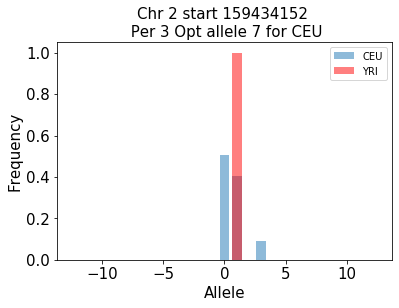

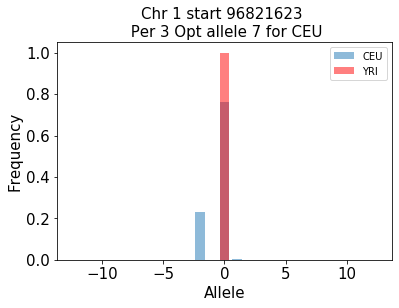

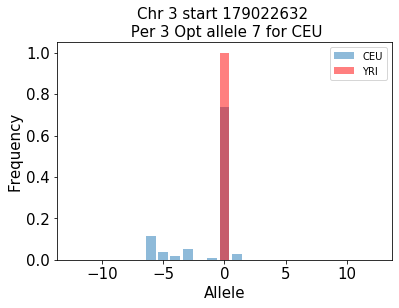

In [84]:
pop1 = 'CEU'
pop2 = 'YRI'
for i in range(0, 3):
    chrom = int(CEU_YRI_df['chrom'].iloc[i])
    start = int(CEU_YRI_df['start'].iloc[i])
    end = int(CEU_YRI_df['end'].iloc[i])
    per = int(CEU_YRI_df['period'].iloc[i])
    
    # Plot 
    CEU_row = CEU_freqs.loc[(CEU_freqs['chrom'] == chrom) & (CEU_freqs['start'] == start)]
    freqs = CEU_row.iloc[0]['freqs']
    opt_allele1, freqs1 = Process_Freqs(freqs, per, end, start, True, True)
    
    YRI_row = YRI_freqs.loc[(YRI_freqs['chrom'] == chrom) & (YRI_freqs['start'] == start)]
    freqs = YRI_row.iloc[0]['freqs']
    opt_allele2, freqs2 = Process_Freqs(freqs, per, end, start, True, True)
    plot(freqs1, freqs2, chrom, start, per, opt_allele1, opt_allele2, pop1, pop2, i+1)

In [88]:
YRI_CHB_df = YRI_CHB_df.loc[YRI_CHB_df['diff_selection'] == 'Y']
YRI_CHB_df = YRI_CHB_df.sort_values(by=['diff_score_med'], ascending=False)
YRI_CHB_df = YRI_CHB_df.loc[YRI_CHB_df['CHB_s_val'] < YRI_CHB_df['YRI_s_val']]
YRI_CHB_df.drop(['end', 'period','motif','diff_score_ci','ci_overlap','diff_opt','diff_selection'], axis=1, inplace=True)

YRI_CHB_df.head(20)

,chrom,start,YRI_optimal_ru,CHB_optimal_ru,YRI_s_val,CHB_s_val,YRI_95%_CI,CHB_95%_CI,YRI_p_val,CHB_p_val,diff_score_med
71251,17,75470921,7,7,0.11250,0.00000,"(0.01633,0.60277)","(0,0.00139)",0.000074,1.000000,0.11250
14220,3,13804606,7,7,0.11250,0.00000,"(0.01633,0.60277)","(0,0.00026)",0.000074,0.347408,0.11250
18897,3,179022632,7,7,0.11250,0.00000,"(0.01633,0.60277)","(0,0.00017)",0.000074,1.000000,0.11250
25116,5,18304812,6,6,0.08156,0.00000,"(0.00774,0.58472)","(0,0.00108)",0.000137,1.000000,0.08156
47662,10,26124023,6,6,0.08156,0.00000,"(0.00774,0.58472)","(0,0.00119)",0.000137,1.000000,0.08156
70301,17,48937462,6,6,0.08156,0.00000,"(0.00774,0.58472)","(0,0.00023)",0.000137,0.289362,0.08156
51807,11,42222643,6,6,0.08156,0.00000,"(0.00774,0.58472)","(0,0.00109)",0.000137,1.000000,0.08156
17722,3,139963009,6,6,0.08156,0.00000,"(0.00774,0.58472)","(0,0.00156)",0.000137,0.351855,0.08156
24038,4,168045258,6,6,0.08156,0.00002,"(0.00774,0.58472)","(0,0.00174)",0.000137,1.000000,0.08154
62756,14,75321390,6,6,0.08156,0.00005,"(0.00774,0.58472)","(0,0.00219)",0.000137,0.272091,0.08151


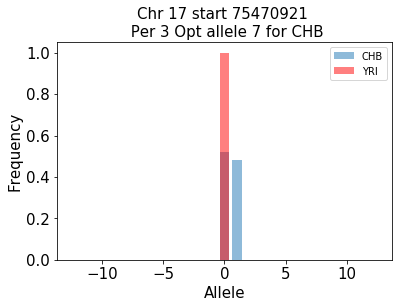

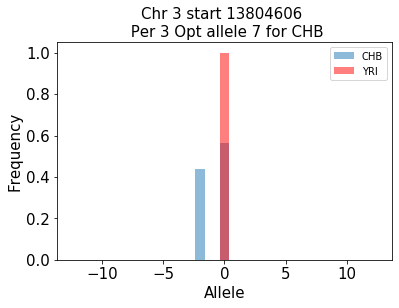

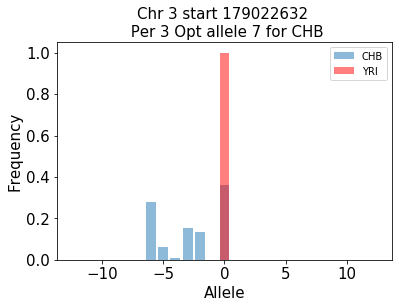

In [86]:
pop1 = 'CHB'
pop2 = 'YRI'
for i in range(0, 3):
    chrom = int(YRI_CHB_df['chrom'].iloc[i])
    start = int(YRI_CHB_df['start'].iloc[i])
    end = int(YRI_CHB_df['end'].iloc[i])
    per = int(YRI_CHB_df['period'].iloc[i])
    
    # Plot 
    CHB_row = CHB_freqs.loc[(CHB_freqs['chrom'] == chrom) & (CHB_freqs['start'] == start)]
    freqs = CHB_row.iloc[0]['freqs']
    opt_allele1, freqs1 = Process_Freqs(freqs, per, end, start, True, True)
    
    YRI_row = YRI_freqs.loc[(YRI_freqs['chrom'] == chrom) & (YRI_freqs['start'] == start)]
    freqs = YRI_row.iloc[0]['freqs']
    opt_allele2, freqs2 = Process_Freqs(freqs, per, end, start, True, True)
    plot(freqs1, freqs2, chrom, start, per, opt_allele1, opt_allele2, pop1, pop2, i+4)